In [1]:
import stat_util
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

### Use case #1

Compute AUC with 95% confidence interval for a single model predictions

In [2]:
np.random.seed(42)
random_array = np.random.rand(100)
# simulated ground truth
y_true = np.round(random_array)
# simulated predictions for a model
y_pred = random_array + np.random.normal(loc=0.0, scale=0.2, size=len(y_true))

In [3]:
# AUC with 95% confidence interval for a single model
score, ci_lower, ci_upper, scores = stat_util.score_ci(y_true, y_pred, 
                                                       score_fun=roc_auc_score,
                                                       seed=42)

AUC=0.94, 95% CI: 0.89-0.98


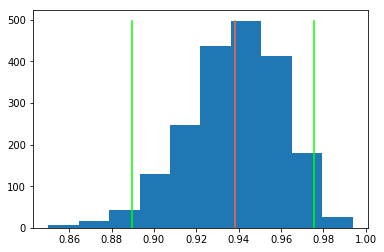

In [4]:
bins = plt.hist(scores)
plt.plot([score, score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("AUC={:.2f}, 95% CI: {:.2f}-{:.2f}".format(score, ci_lower, ci_upper))

### Use case #2

Compare two models by computing p-value for a difference in their performance measured with AUC

In [5]:
np.random.seed(42)
random_array = np.random.rand(100)
# simulated ground truth
y_true = np.round(random_array)
# simulated predictions for model I
y_pred1 = random_array + np.random.normal(loc=0.0, scale=0.2, size=len(y_true))
# simulated predictions for model II
y_pred2 = random_array + np.random.normal(loc=0.0, scale=0.3, size=len(y_true))

In [6]:
# p-value comparing AUC for model I and model II
p, z = stat_util.pvalue(y_true, y_pred1, y_pred2, 
                        score_fun=roc_auc_score,
                        seed=42)

p=0.01


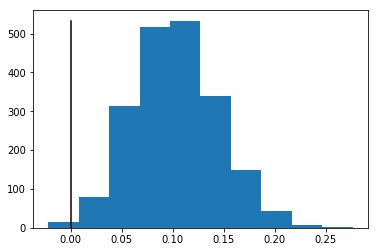

In [7]:
bins = plt.hist(z)
plt.plot([0, 0], [0, np.max(bins[0])], color="black")
print("p={}".format(p))

### Use case #3

Compute mean AUC with 95% confidence interval for a set of 10 readers/models

In [8]:
np.random.seed(42)
random_array = np.random.rand(100)
# simulated ground truth
y_true = np.round(random_array)
# simulated predictions for readers
y_pred_readers = []
for _ in range(10):
    scale = np.random.normal(loc=0.3, scale=0.1)
    y_pred_r = random_array + np.random.normal(loc=0.0, scale=scale, size=len(y_true))
    y_pred_readers.append(y_pred_r)

In [9]:
# mean AUC with 95% confidence interval for 10 readers/models
mean_score, ci_lower, ci_upper, scores = stat_util.score_stat_ci(y_true, y_pred_readers, 
                                                                 score_fun=roc_auc_score,
                                                                 stat_fun=np.mean,
                                                                 seed=42)

mean AUC=0.87, 95% CI: 0.82-0.91


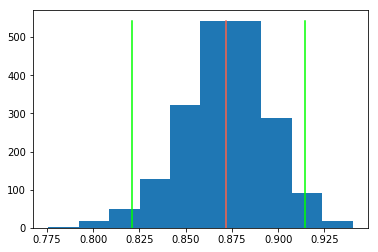

In [10]:
bins = plt.hist(scores)
plt.plot([mean_score, mean_score], [0, np.max(bins[0])], color="tomato")
plt.plot([ci_lower, ci_lower], [0, np.max(bins[0])], color="lime")
plt.plot([ci_upper, ci_upper], [0, np.max(bins[0])], color="lime")
print("mean AUC={:.2f}, 95% CI: {:.2f}-{:.2f}".format(mean_score, ci_lower, ci_upper))

### Use case #4

Compare one model to a set of readers by computing p-value for a difference in their performance measured with AUC

In [11]:
np.random.seed(42)
random_array = np.random.rand(100)
# simulated ground truth
y_true = np.round(random_array)
# simulated predictions for a model
y_pred = random_array + np.random.normal(loc=0.0, scale=0.2, size=len(y_true))
# simulated predictions for readers
y_pred_readers = []
for _ in range(10):
    scale = np.random.normal(loc=0.3, scale=0.1)
    y_pred_r = random_array + np.random.normal(loc=0.0, scale=scale, size=len(y_true))
    y_pred_readers.append(y_pred_r)

In [12]:
# p-value comparing AUC for a model to mean AUC for 10 readers
p, z = stat_util.pvalue_stat(y_true, y_pred, y_pred_readers, 
                             score_fun=roc_auc_score,
                             stat_fun=np.mean,
                             seed=42)

p=0.009


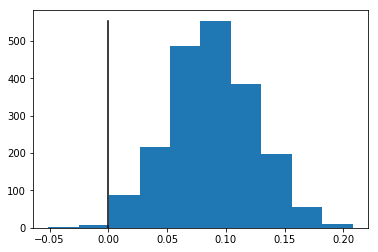

In [13]:
bins = plt.hist(z)
plt.plot([0, 0], [0, np.max(bins[0])], color="black")
print("p={}".format(p))